# A synthetic time-series dataset
This is a notebook that is used to test our forecasting algorithm by first generating a known synthetic waveform, generating a dataset that follows that waveform, and then using a model to predict the trajectory.

In [1]:
# Import dependencies
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Sine wave generator
We will start with a dataframe that generates a set that follows a regular sine wave.

In [2]:
DAY = 24 * 60 ** 2
YEAR = DAY * 365.2425

def sine_frame(): 
    """Generates a dataframe with a sine waveform"""
    df = pd.DataFrame(columns=['date', 'y'])
    df['date'] = pd.date_range(start='2018-01-01', end='2020-12-31', freq='d')
    df['y'] = 1 + np.sin(df['date'].view(np.int64) // 1e9 * (2 * np.pi / YEAR))
    df['y'] = (df['y'] * 100).round(2)
    df['date'] = df['date'].apply(lambda x : x.strftime("%Y-%m-%d"))
    return df

test_df = sine_frame()

Let's plot our waveform now to observe the sinewave function

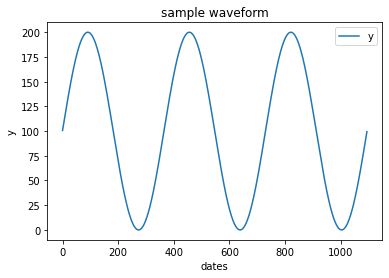

In [3]:
def plot_waveform(df: pd.DataFrame, *args):
    df.plot()
    if len(args) >= 3:
        plt.title(args[0])
        plt.xlabel(args[1])
        plt.ylabel(args[2])
    elif len(args) == 2:
        plt.xlabel(args[0])
        plt.ylabel(args[1])
    elif len(args) == 1:
        plt.title(args[0])
    else:
        return

plot_waveform(test_df, "sample waveform", "dates", "y")